## Austin Heath
### UK Sales Ecommerce Analysis: http://archive.ics.uci.edu/ml/datasets/Online+Retail
##### (RFM Clustering)

In [219]:
#import libraries 
import warnings
import datetime as dt
import requests
import io
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from babel.numbers import format_currency

In [220]:
#read data
ecommerce_data=pd.read_csv("/content/data.csv",header=0,encoding="ISO-8859-1", dtype={'CustomerID': str,'InvoiceID': str},
                 parse_dates = ['InvoiceDate'], infer_datetime_format = True)

In [221]:
ecommerce_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [222]:
ecommerce_data.Country.value_counts()


United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [223]:
#focus on UK Sales
UK_sales = ecommerce_data[ecommerce_data['Country']=="United Kingdom"]

In [224]:
UK_sales.describe()


,Quantity,UnitPrice
count,495478.000000,495478.000000
mean,8.605486,4.532422
std,227.588756,99.315438
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.100000
75%,10.000000,4.130000
max,80995.000000,38970.000000


## Explore Distribution of *Variables*
### Unit Price & Quantity appear skewed

Text(0.5, 1.0, 'Boxplot for Unit Price')

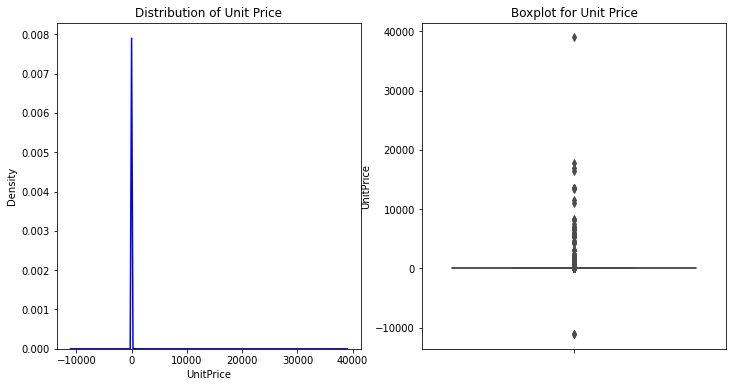

In [225]:
fig, axes = plt.subplots(1, 2, figsize = (12, 6))
sns.kdeplot(UK_sales["UnitPrice"], ax = axes[0],color = "blue").set_title("Distribution of Unit Price")
sns.boxplot(y = UK_sales["UnitPrice"], ax = axes[1], color = "blue").set_title("Boxplot for Unit Price")

Text(0.5, 1.0, 'Boxplot for Quantity')

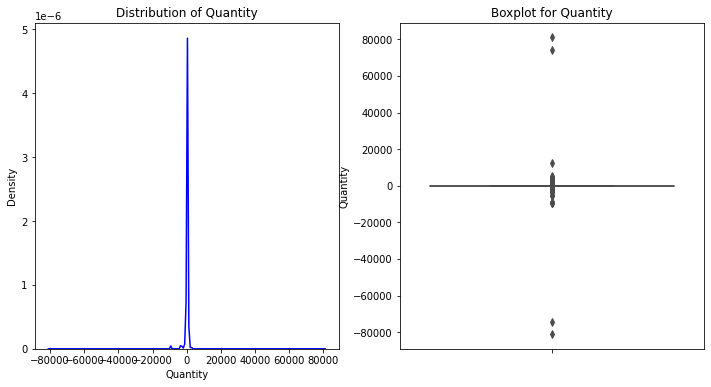

In [226]:
fig, axes = plt.subplots(1, 2, figsize = (12, 6))
sns.kdeplot(UK_sales["Quantity"], ax = axes[0], color = "blue").set_title("Distribution of Quantity")
sns.boxplot(y = UK_sales["Quantity"], ax = axes[1], color = "blue").set_title("Boxplot for Quantity")

### Missing Data

In [227]:
pd.DataFrame(data = (UK_sales.isna().sum() / UK_sales.shape[0]) * 100, index = UK_sales.columns, columns = ['% Null Values'])

,% Null Values
InvoiceNo,0.000000
StockCode,0.000000
Description,0.293454
Quantity,0.000000
InvoiceDate,0.000000
UnitPrice,0.000000
CustomerID,26.963861
Country,0.000000


### Drop transactions with negative price

In [228]:
neg_price = UK_sales[UK_sales["UnitPrice"]<0]
neg_price

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [229]:
UK_sales_clean = UK_sales[UK_sales["UnitPrice"]>0]

### Drop cancellations with negative quantity

*   "C" in the invoice No refers to cancellation
*   Need a seperate project to forecast cancellation rates



In [230]:
UK_sales_clean[UK_sales_clean['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


In [231]:
#drop cancellations from dataset
UK_sales_clean = UK_sales_clean[UK_sales_clean["Quantity"]>0]

In [232]:
UK_sales.drop_duplicates(inplace=True)

##Data Transformation to Address Skewness


Text(0.5, 1.0, 'Log Quantity Distribution ')

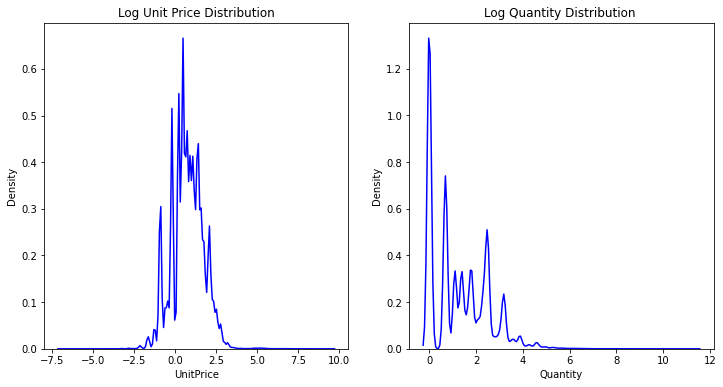

In [233]:
fig, axes = plt.subplots(1, 2, figsize = (12, 6))
sns.kdeplot(np.log(UK_sales_clean["UnitPrice"]),ax = axes[0], color = "blue").set_title("Log Unit Price Distribution")
sns.kdeplot(np.log(UK_sales_clean["Quantity"]), ax = axes[1], color = "blue").set_title("Log Quantity Distribution ")

In [234]:
### eliminate data outliers well above 99th percentile for quantity variable
np.quantile(UK_sales_clean.Quantity, 0.99)

100.0

In [235]:
print("There were {} observations before cleaning the data of outliers".format(UK_sales_clean.shape[0]))
UK_sales_clean_normal = UK_sales_clean[(UK_sales_clean.Quantity < 145)]
print("There are now {} observations after cleaning the data of outliers".format(UK_sales_clean_normal.shape[0]))

There were 485123 observations before cleaning the data of outliers
There are now 483033 observations after cleaning the data of outliers


In [236]:
print("Upper limit for UnitPrice: " + str(np.exp(3)))
print("Lower limit for UnitPrice: " + str(np.exp(-2.5)))
np.quantile(UK_sales_clean_normal.UnitPrice, 0.99)

Upper limit for UnitPrice: 20.085536923187668
Lower limit for UnitPrice: 0.0820849986238988


16.95

In [237]:
#remove outliers in unit price
print("There were {} observations before cleaning the data of outliers".format(UK_sales_clean_normal.shape[0]))
UK_sales_clean_normal = UK_sales_clean_normal[(UK_sales_clean_normal.UnitPrice > 0.08) & (UK_sales_clean_normal.UnitPrice < 20.04)]
print("There are now {} observations after cleaning the data of outliers".format(UK_sales_clean_normal.shape[0]))

There were 483033 observations before cleaning the data of outliers
There are now 479543 observations after cleaning the data of outliers


Text(0.5, 1.0, 'Distribution of Log Quantity After Removing Outliers ')

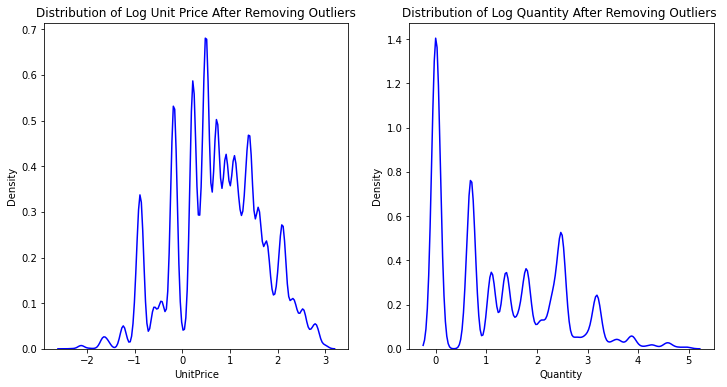

In [238]:
fig, axes = plt.subplots(1, 2, figsize = (12, 6))
sns.kdeplot(np.log(UK_sales_clean_normal["UnitPrice"]),ax = axes[0], color = "blue").set_title("Distribution of Log Unit Price After Removing Outliers")
sns.kdeplot(np.log(UK_sales_clean_normal["Quantity"]), ax = axes[1], color = "blue").set_title("Distribution of Log Quantity After Removing Outliers ")

## Final UK Dataset for Data Models
* add total price variable (quantity * unit price)

In [239]:
#create total price column
UK_sales_clean_normal['TotalPrice'] = UK_sales_clean_normal['Quantity'] * UK_sales_clean_normal['UnitPrice']

In [240]:
#create date column
UK_sales_clean_normal['Date'] = UK_sales_clean_normal['InvoiceDate'].apply(lambda x: x.date())


In [241]:
UK_sales_clean_normal.describe()

,Quantity,UnitPrice,TotalPrice
count,479543.000000,479543.000000,479543.000000
mean,7.713809,3.143594,15.052698
std,13.528378,3.002341,29.387180
min,1.000000,0.090000,0.100000
25%,1.000000,1.250000,3.320000
50%,3.000000,2.100000,8.300000
75%,10.000000,4.130000,16.600000
max,144.000000,20.000000,1914.240000


In [242]:
UK_sales_clean[UK_sales_clean['CustomerID'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


## RFM Analysis: Puts Customers Into Clusters Based on Behavior
### Recency - Time since last order
### Frequency - Time between transactions
### Monetary - Total value of transactions per customer

In [243]:
print("Min date: {}".format(UK_sales_clean_normal.InvoiceDate.min()))
print("Max date: {}".format(UK_sales_clean_normal.InvoiceDate.max()))


Min date: 2010-12-01 08:26:00
Max date: 2011-12-09 12:49:00


In [244]:
#Recency 
RFM_df = UK_sales_clean_normal.groupby(by='CustomerID', as_index=False)['Date'].max()
RFM_df.columns = ['CustomerID','LastPurshaceDate']
#set last day of dataset
now = dt.date(2011,12,9)
## number of days since last purchase
RFM_df['Recency'] = RFM_df['LastPurshaceDate'].apply(lambda x: (now - x).days)

RFM_df

,CustomerID,LastPurshaceDate,Recency
0,12747,2011-12-07,2
1,12748,2011-12-09,0
2,12749,2011-12-06,3
3,12820,2011-12-06,3
4,12821,2011-05-09,214
...,...,...,...
3878,18280,2011-03-07,277
3879,18281,2011-06-12,180
3880,18282,2011-12-02,7
3881,18283,2011-12-06,3


In [245]:
#Frequency 

#Keep one instance of customer id per invoice
RFP_frequency = UK_sales_clean_normal.copy()
RFP_frequency.drop_duplicates(['InvoiceNo','CustomerID'],keep='first',inplace=True)
# count the number of purchases per customer
RFP_frequency = RFP_frequency.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
RFP_frequency.columns = ['CustomerID','Frequency']
RFP_frequency

,CustomerID,Frequency
0,12747,11
1,12748,206
2,12749,5
3,12820,4
4,12821,1
...,...,...
3878,18280,1
3879,18281,1
3880,18282,2
3881,18283,16


In [246]:
#Monetary 
RFP_monetary = UK_sales_clean_normal.groupby(by='CustomerID',as_index=False).agg({'TotalPrice': 'sum'})
RFP_monetary.columns = ['CustomerID','Monetary']
RFP_monetary.head()

,CustomerID,Monetary
0,12747,4196.01
1,12748,31168.24
2,12749,4040.88
3,12820,942.34
4,12821,92.72


In [247]:
# RFP table
RFM_table = RFP_monetary.merge(RFP_frequency,on='CustomerID').merge(RFM_df,on='CustomerID')
RFM_table.set_index('CustomerID',inplace=True)
RFM_table.drop('LastPurshaceDate',axis=1,inplace=True)
RFM_table.head()

,Monetary,Frequency,Recency
CustomerID,,,
12747,4196.01,11,2
12748,31168.24,206,0
12749,4040.88,5,3
12820,942.34,4,3
12821,92.72,1,214


In [248]:
# Add segment map for clustering customers - https://guillaume-martin.github.io/rfm-segmentation-with-python.html
segment_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At-Risk',
    r'[1-2]5': 'Cannot lose them',
    r'3[1-2]': 'About To Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

In [249]:
# Put customers in buckets based on the segment map
#low number is better for recency label
recency_label = range(5, 0, -1)
# big numbers are better for frequency and monetary
fm_labels = range(1, 6)

#bucket customers into quintiles (5 groups) based on ranking of recency, monetary, and frequency measurements
RFM_table["M"] = pd.qcut(RFM_table["Monetary"], 5, labels = fm_labels)
RFM_table["R"] = pd.qcut(RFM_table["Recency"], 5, labels = recency_label)
RFM_table["F"] = pd.qcut(RFM_table["Frequency"].rank(method = 'first'), 5, labels = fm_labels)
#create cumulative score
RFM_table["RFM_Score"] = RFM_table[["R", "F", "M"]].sum(axis = 1)
RFM_table

,Monetary,Frequency,Recency,M,R,F,RFM_Score
CustomerID,,,,,,,
12747,4196.01,11,2,5,5,5,15
12748,31168.24,206,0,5,5,5,15
12749,4040.88,5,3,5,5,4,14
12820,942.34,4,3,4,5,4,13
12821,92.72,1,214,1,1,1,3
...,...,...,...,...,...,...,...
18280,180.60,1,277,1,1,2,4
18281,80.82,1,180,1,1,2,4
18282,178.05,2,7,1,5,3,9


In [250]:
# Put recency, monetary, and frequency measurements into a string that customer map can understand
RFM_table['Segment'] = RFM_table['R'].astype(str) + RFM_table['F'].astype(str)
RFM_table['Segment'] = RFM_table['Segment'].replace(segment_map, regex=True)
RFM_table


,Monetary,Frequency,Recency,M,R,F,RFM_Score,Segment
CustomerID,,,,,,,,
12747,4196.01,11,2,5,5,5,15,Champions
12748,31168.24,206,0,5,5,5,15,Champions
12749,4040.88,5,3,5,5,4,14,Champions
12820,942.34,4,3,4,5,4,13,Champions
12821,92.72,1,214,1,1,1,3,Hibernating
...,...,...,...,...,...,...,...,...
18280,180.60,1,277,1,1,2,4,Hibernating
18281,80.82,1,180,1,1,2,4,Hibernating
18282,178.05,2,7,1,5,3,9,Potential Loyalists


In [251]:
#reset index to include customer id as a column
RFM_summary = RFM_table.reset_index()

RFM_summary.columns
# summarize customer clusters


Index(['CustomerID', 'Monetary', 'Frequency', 'Recency', 'M', 'R', 'F',
       'RFM_Score', 'Segment'],
      dtype='object')

In [252]:
RFM_summary_table = RFM_summary.groupby("Segment").agg({"CustomerID": "nunique",
                                                              "Recency": "mean",
                                                              "Frequency": "mean",
                                                              "Monetary": "mean"})
RFM_summary_table["Recency"] = RFM_summary_table["Recency"].round(decimals = 0)
RFM_summary_table["Frequency"] = RFM_summary_table["Frequency"].round(decimals = 1)
RFM_summary_table["Monetary"] = RFM_summary_table["Monetary"].round(decimals = 2)
RFM_summary_table["Monetary"] = RFM_summary_table["Monetary"].apply(lambda x: format_currency(x, currency="GBP"))


RFM_summary_table.rename(columns = {"CustomerID": "Number of Customers"}, inplace = True)
RFM_summary_table.rename(columns = {"Recency":"Average Days Since Last Purchase"}, inplace = True)
RFM_summary_table.rename(columns = {"Frequency":"Average Lifetime Purchases"}, inplace = True)
RFM_summary_table.rename(columns = {"Monetary":"Average Lifetime Value"}, inplace = True)


RFM_summary_table

,Number of Customers,Average Days Since Last Purchase,Average Lifetime Purchases,Average Lifetime Value
Segment,,,,
About To Sleep,318,52.0,1.2,£413.79
At-Risk,521,154.0,2.9,£853.59
Cannot lose them,59,133.0,8.5,"£2,453.75"
Champions,571,5.0,12.0,"£4,872.53"
Hibernating,957,216.0,1.1,£329.41
Loyal Customers,727,33.0,6.4,"£2,263.54"
Need Attention,171,51.0,2.3,£818.86
New Customers,36,7.0,1.0,£284.99
Potential Loyalists,440,16.0,2.0,£614.79


## Using the RFM table, we have customer segments that allow for customized marketing approaches